Set-up

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from statannotations.Annotator import Annotator

In [14]:
os.getcwd()
#working directory should be /Code/CodeFigure3

'/Users/emilly/Library/CloudStorage/Dropbox/UCSF Nystul Lab/NystulLabRepo/WolfgramAgingOvary/Code/CodeFigure3'

Plotting the frequency of lysotracker band on the Fas3 border in 1 vs 6 week w1118(x)

Note: You will need to run the StatsLysotrackerw1118.Rmd file first, or annotate out the stats code

In [36]:
csv_path = "../../Data/DataFigure3/w1118LysoFas31v6_n.csv"
df = pd.read_csv(csv_path)

In [37]:
df['Weeks'] = df['Weeks'].map({1: '1 Week', 6: '6 Weeks'})

df['PerLysoFas3'] = df['LysoFas3_1v6'] *100

In [38]:
df.head(7)

,Weeks,LysoFas3_1v6,n,N,PerLysoFas3
0,1 Week,0.5294,17,1,52.94
1,1 Week,0.5238,21,2,52.38
2,1 Week,0.4884,86,3,48.84
3,6 Weeks,0.5385,13,1,53.85
4,6 Weeks,0.4286,42,2,42.86
5,6 Weeks,0.3929,28,3,39.29


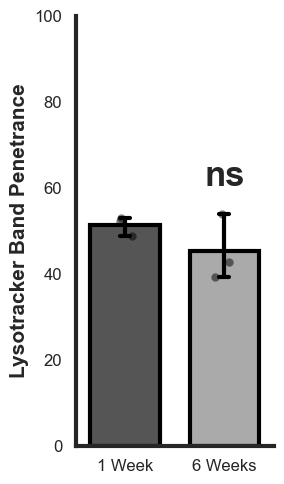

In [39]:
stats_path = "../../Results/ResultsFigure3/StatsLysoFas31v6ttest.csv"
stats = pd.read_csv(stats_path)

stats["WeekNum"] = stats["comparison"].str.extract(r"(\d+)").astype(int)
star = stats.loc[0, "stars"]
week_to_annotate = stats.loc[0, "WeekNum"]


df["WeekNum"] = df["Weeks"].str.extract(r"(\d+)").astype(int)

week_order = sorted(df["WeekNum"].unique())
label_order = (
    df.drop_duplicates("WeekNum")
      .sort_values("WeekNum")["Weeks"]
      .tolist()
)


fig, ax = plt.subplots(figsize=(3, 5))
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x='Weeks',
    y='PerLysoFas3',
    hue='Weeks',
    palette='gray',
    capsize=0.1,
    err_kws={'color': 'black', 'linewidth': 3},
    edgecolor="black",
    linewidth=3,
    width=0.7
)

sns.stripplot(data=df, 
              x='Weeks', 
              y='PerLysoFas3',
              ax=ax, 
              color='black', 
              alpha=0.5,
              size=6, 
              jitter=True, 
              dodge=True
)

y_max = df.groupby("WeekNum")["PerLysoFas3"].max()
offset = 5

x_position = week_order.index(week_to_annotate)

ax.text(
    x=x_position,
    y=y_max.loc[week_to_annotate] + offset,
    s=star,
    ha="center",
    va="bottom",
    fontsize=25,
    fontweight="bold"
)

plt.ylim(0, 100)
plt.ylabel("Lysotracker Band Penetrance", fontsize=15, weight="bold")
plt.xlabel("")

ax.tick_params(width=3, labelsize=12)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

results_directory = '../../Results'
filename = os.path.join(results_directory, 'ResultsFigure3', 'LysoFas31v6w1118.pdf')
os.makedirs(os.path.dirname(filename), exist_ok=True)
plt.savefig(
    filename,
    format='pdf',
    bbox_inches='tight'
)

plt.tight_layout()
plt.show()

Plotting the frequency of lysotracker band on the Fas3 border in 6 week in no phenotype vs phenotype

Note: You will need to run the StatsLysotrackerw1118.Rmd file first, or annotate out the stats code

In [40]:
csv_path = "../../Data/DataFigure3/w1118LysoFas36wkNovsPheno_n.csv"
df = pd.read_csv(csv_path)

In [41]:
df['PerLyso6wk'] = df['LysoFas36wk_NovsPheno'] * 100

df['Phenotype'] = df['Phenotype'].map({0: 'No Phenotype', 1: 'Phenotype'})

In [42]:
df.head(7)

,Weeks,Phenotype,LysoFas36wk_NovsPheno,n,N,PerLyso6wk
0,6,Phenotype,0.2857,7,1,28.57
1,6,No Phenotype,0.8333,6,1,83.33
2,6,Phenotype,0.3333,36,2,33.33
3,6,No Phenotype,1.0000,6,2,100.00
4,6,Phenotype,0.2143,14,3,21.43
5,6,No Phenotype,0.5714,14,3,57.14


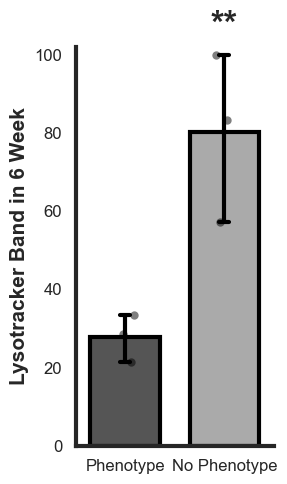

In [43]:
stats_path = "../../Results/ResultsFigure3/StatsLysoFas36wkNovsPhenoGlmm.csv"
stats = pd.read_csv(stats_path)

star = stats.loc[0, "stars"]

fig, ax = plt.subplots(figsize=(3, 5))
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x="Phenotype",
    y="PerLyso6wk",
    hue="Phenotype",
    palette="gray",
    capsize=0.1,
    err_kws={"color": "black", "linewidth": 3},
    edgecolor="black",
    linewidth=3,
    width=0.7,
    ax=ax
)

sns.stripplot(
    data=df,
    x="Phenotype",
    y="PerLyso6wk",
    color="black",
    alpha=0.5,
    size=6,
    jitter=True,
    dodge=True,
    ax=ax
)

y_max = df["PerLyso6wk"].max()
offset = 3

ax.text(
    x=x_position,
    y=y_max + offset,
    s=star,
    ha="center",
    va="bottom",
    fontsize=25,
    fontweight="bold"
)

plt.ylim(0, 102)
plt.ylabel("Lysotracker Band in 6 Week", fontsize=15, weight="bold")
plt.xlabel("")

ax.tick_params(width=3, labelsize=12)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

results_directory = '../../Results'
filename = os.path.join(results_directory, 'ResultsFigure3', 'LysoFas36wkNovsPheno.pdf')
os.makedirs(os.path.dirname(filename), exist_ok=True)
plt.savefig(
    filename,
    format='pdf',
    bbox_inches='tight'
)

plt.tight_layout()
plt.show()

Plotting phenotype penetrance in no Lysotracker band condition for 1 vs 6 weeks w1118

Note: You will need to run the StatsLysotrackerw1118.Rmd file first, or annotate out the stats code

In [50]:
csv_path = "../../Data/DataFigure3/w1118NoLysoFas3PhenoPen1v6_n.csv"
df = pd.read_csv(csv_path)

In [51]:
df['Weeks'] = df['Weeks'].map({1: '1 Week', 6: '6 Weeks'})

df['PerNoBandPheno'] = df['NoLysoFas3_Pheno1v6'] *100

In [52]:
df.head(7)

,Weeks,NoLysoFas3_Pheno1v6,n,N,PerNoBandPheno
0,1 Week,0.2500,8,1,25.00
1,1 Week,0.1000,10,2,10.00
2,1 Week,0.0682,44,3,6.82
3,6 Weeks,0.8333,6,1,83.33
4,6 Weeks,1.0000,24,2,100.00
5,6 Weeks,0.6471,17,3,64.71


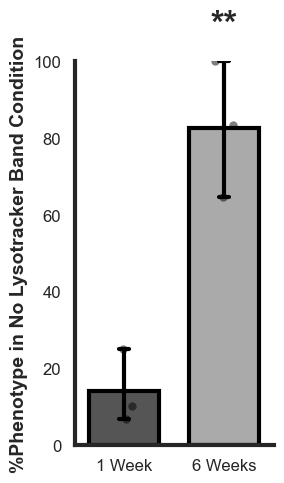

In [55]:
stats_path = "../../Results/ResultsFigure3/StatsPhenoNoLyso1v6ttest.csv"
stats = pd.read_csv(stats_path)

stats["WeekNum"] = stats["comparison"].str.extract(r"(\d+)").astype(int)
star = stats.loc[0, "stars"]
week_to_annotate = stats.loc[0, "WeekNum"]


df["WeekNum"] = df["Weeks"].str.extract(r"(\d+)").astype(int)

week_order = sorted(df["WeekNum"].unique())
label_order = (
    df.drop_duplicates("WeekNum")
      .sort_values("WeekNum")["Weeks"]
      .tolist()
)


fig, ax = plt.subplots(figsize=(3, 5))
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x='Weeks',
    y='PerNoBandPheno',
    hue='Weeks',
    palette='gray',
    capsize=0.1,
    err_kws={'color': 'black', 'linewidth': 3},
    edgecolor="black",
    linewidth=3,
    width=0.7
)

sns.stripplot(data=df, 
              x='Weeks', 
              y='PerNoBandPheno',
              ax=ax, 
              color='black', 
              alpha=0.5,
              size=6, 
              jitter=True, 
              dodge=True
)

y_max = df.groupby("WeekNum")["PerNoBandPheno"].max()
offset = 5

x_position = week_order.index(week_to_annotate)

ax.text(
    x=x_position,
    y=y_max.loc[week_to_annotate] + offset,
    s=star,
    ha="center",
    va="bottom",
    fontsize=25,
    fontweight="bold"
)

plt.ylim(0, 100)
plt.ylabel("%Phenotype in No Lysotracker Band Condition", fontsize=14, weight="bold")
plt.xlabel("")

ax.tick_params(width=3, labelsize=12)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

results_directory = '../../Results'
filename = os.path.join(results_directory, 'ResultsFigure3', 'PhenoPenetranceNoLyso1v6w1118.pdf')
os.makedirs(os.path.dirname(filename), exist_ok=True)
plt.savefig(
    filename,
    format='pdf',
    bbox_inches='tight'
)

plt.tight_layout()
plt.show()